# Testing Functions manipulating dataframes

In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu
#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("talk")
%matplotlib inline
#* renamed it to remove_outliers in tiling_disk_utils
def kill_big_outliers(df, mode='z', cut_threshold=100):
    """df as usual, z in µm!!!!
    returns: df with z_clean -> z within +-100µm of mean of each
        hexagon """
    for hexagon in df.hex_nr.unique():
        temp_df = df.loc[df.hex_nr == hexagon,:]
        hex_mean = temp_df[mode].median()
        lower_cut = hex_mean - cut_threshold
        upper_cut = hex_mean + cut_threshold
        print(f'hex_nr = {hexagon}')
        print(f'hex_mean = {hex_mean}')
        print(f'lower_cut = {lower_cut}')
        print(f'upper_cut = {upper_cut}')
        def temp_sort_func(z):
            return  z if lower_cut < z < upper_cut else np.NaN
        df[mode] = df.loc[:,mode].apply(lambda z: temp_sort_func(z))
    return df 



## test reading google sheets into df

In [2]:
sheet_id = '1Pz2pHkf7AzKAfGPPVjLGofgpcrwVyGpTJu8phObsqvg'
sheet_name = 'measurements_meta_db'
exp_name = 'experiments_db'

meta_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={exp_name}'

In [3]:
meta_data = pd.read_csv(meta_url)

In [4]:
exp_data = pd.read_csv(exp_url)
exp_data

,exp_id,exp_description,exp_description_short
0,1,first vaccum test out of curiousity; no cap,first tests - no analysis
1,2,first pringels effect suspected;tested lao and...,first orientation pringels test
2,3,experiment unkown; no data analysis found,unkown
3,4,systematic pringles study on all hexagons on t...,all hexagons pringles study steel
4,5,systematic pringles study on all hexagons on t...,all hexagons pringles study lao
5,6,pringles effect pressure dependence study for lao,pringles effect pressure dependence lao
6,7,first long period attempt of a measurement sys...,old msa
7,8,search for light influences on the measurement,light influence search
8,9,pringles effect pressure dependence study for ...,pringles effect pressure dependence steel
9,10,nightshift for investigating light influence,light influence nightshift


In [5]:
lower_cut = 5
upper_cut = 10
def temp_sort_func(z):
    return  z if lower_cut < z < upper_cut else np.NaN

In [6]:
z=5
temp_sort_func(z)

nan

## curing data

In [66]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / 'triplets'

In [70]:
curing_triplets_df = tdu.read_single_measurement(measurement_folder, '20220414_trip_v7_curing.txt')
# curing_triplets_df = tdu.add_ring_nr_label(curing_triplets_df)
curing_triplets_df = tdu.df_convert_unix_to_datetime(curing_triplets_df)

Reading data...
Reading done


In [71]:
curing_triplets_df = tdu.filter_data(curing_triplets_df)
curing_triplets_df.z = tdu.convert_mm_to_microns(curing_triplets_df.z)
# curing_triplets_df.z = tdu.subtract_mean(curing_triplets_df.z)

In [47]:
curing_triplets_df.tail()

,run_nr,hex_nr,point,x,y,z,unix_time,datetime
168473,24,11,60,25.65,-120.26,-24.844413,1649990010,2022-04-15 04:33:30+02:00
168474,24,11,60,25.83,-120.44,0.155587,1649990010,2022-04-15 04:33:30+02:00
168475,24,11,60,26.08,-120.51,-12.844413,1649990010,2022-04-15 04:33:30+02:00
168476,24,11,60,26.33,-120.44,-18.844413,1649990010,2022-04-15 04:33:30+02:00
168477,24,11,60,26.51,-120.26,6.155587,1649990011,2022-04-15 04:33:31+02:00


## test kill outliers

In [48]:
test_df = curing_triplets_df.loc[(curing_triplets_df.run_nr==1) &( (curing_triplets_df.hex_nr == 19) | (curing_triplets_df.hex_nr == 18)),:]

In [49]:
test_col_zero = np.zeros(test_df.z.count()//3 +1)

In [50]:
test_col_101 = np.ones(test_df.z.count()//3 +1)

In [51]:
test_col_25 = np.ones(test_df.z.count()//3 -1) + 24

In [52]:
test_col_101 = (test_col_101 * 100)+1

In [53]:
test_col_101

array([101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 10

In [54]:
total_test_col = np.concatenate((test_col_zero, test_col_101, test_col_25) )

In [55]:
total_test_col

array([ 0.,  0.,  0., ..., 25., 25., 25.])

In [56]:
test_df['z_test'] = total_test_col

C:\Users\Domin\AppData\Local\Temp\ipykernel_20080\2456224507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['z_test'] = total_test_col


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

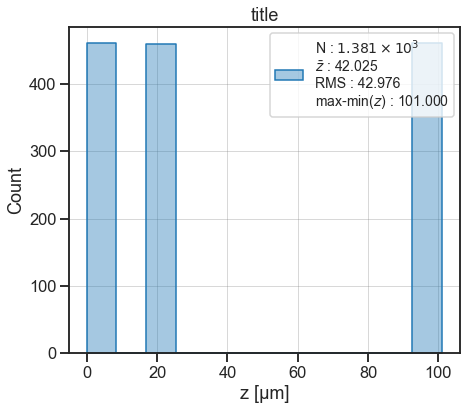

In [57]:
tdp.ts_hist(test_df, 'z_test')

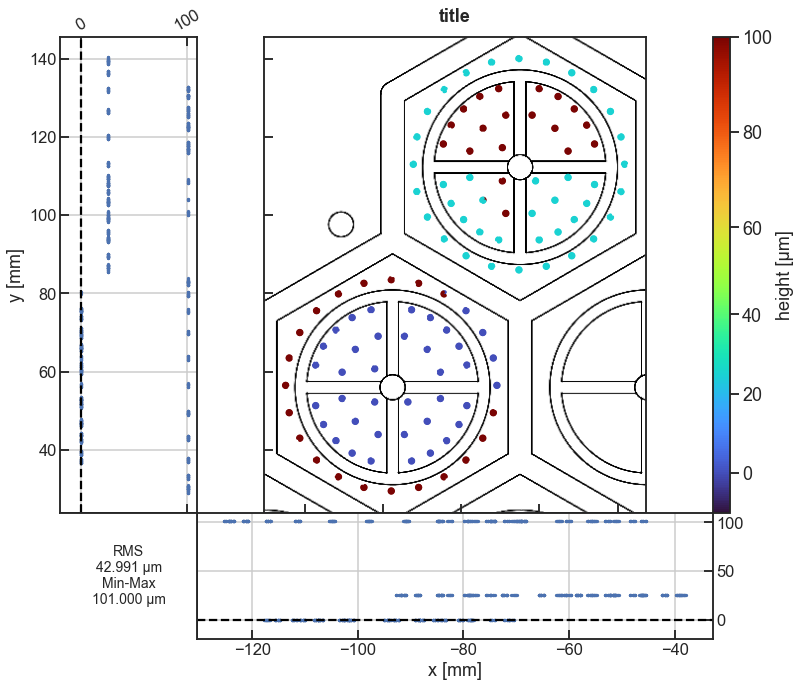

In [58]:
fig, ax = tdp.plot_table_hexagon_flatness(test_df,
                                          mode='z_test',
                                          cbar_norm=(-10, 50, 100),
                                          size=4,
                                          triplet=True)


In [59]:
test_df = kill_big_outliers(test_df, mode='z_test', cut_threshold=50)

hex_nr = 19
hex_mean = 0.0
lower_cut = -50.0
upper_cut = 50.0
hex_nr = 18
hex_mean = 25.0
lower_cut = -25.0
upper_cut = 75.0


C:\Users\Domin\AppData\Local\Temp\ipykernel_20080\2463418030.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mode] = df.loc[:,mode].apply(lambda z: temp_sort_func(z))


In [60]:
test_df

,run_nr,hex_nr,point,x,y,z,unix_time,datetime,z_test
11,1,19,2,-94.52,69.07,-67.844413,1649937423,2022-04-14 13:57:03+02:00,0.0
12,1,19,2,-94.02,69.07,-12.844413,1649937424,2022-04-14 13:57:04+02:00,0.0
13,1,19,2,-94.08,69.32,24.155587,1649937424,2022-04-14 13:57:04+02:00,0.0
14,1,19,2,-94.27,69.50,-42.844413,1649937424,2022-04-14 13:57:04+02:00,0.0
15,1,19,2,-94.52,69.57,-36.844413,1649937425,2022-04-14 13:57:05+02:00,0.0
...,...,...,...,...,...,...,...,...,...
1552,1,18,60,-39.67,106.03,67.155587,1649937898,2022-04-14 14:04:58+02:00,25.0
1553,1,18,60,-39.60,105.78,48.155587,1649937898,2022-04-14 14:04:58+02:00,25.0
1555,1,18,60,-39.17,105.53,61.155587,1649937899,2022-04-14 14:04:59+02:00,25.0
1556,1,18,60,-38.92,105.60,0.155587,1649937899,2022-04-14 14:04:59+02:00,25.0


In [61]:
test_df.keys()

Index(['run_nr', 'hex_nr', 'point', 'x', 'y', 'z', 'unix_time', 'datetime',
       'z_test'],
      dtype='object')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

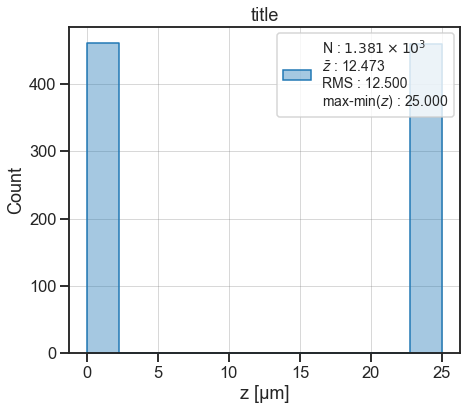

In [62]:
tdp.ts_hist(test_df,mode='z_test')

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='x [mm]', ylabel='y [mm]'>)

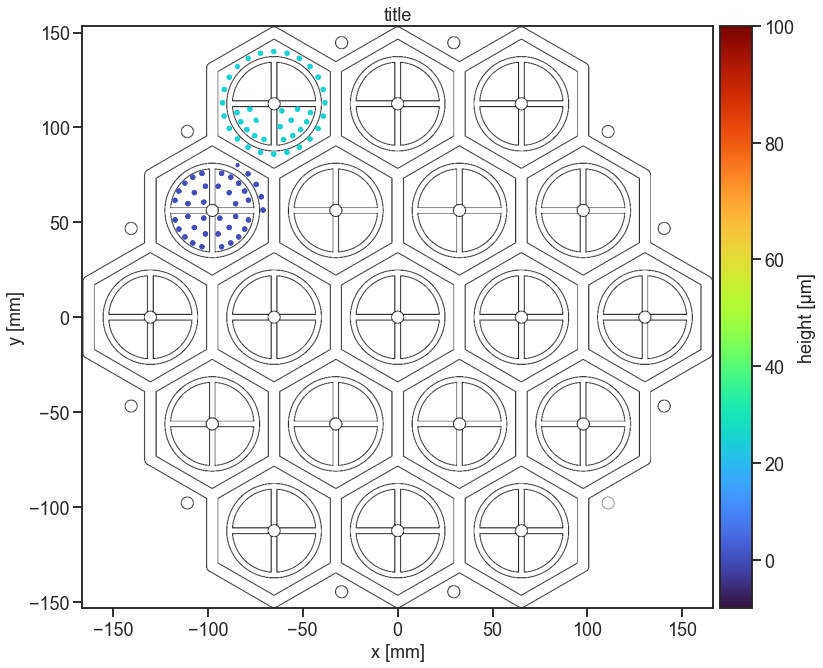

In [63]:
tdp.full_hexagon_plot(test_df, mode='z_test', cbar_norm=(-10, 50, 100), size=4)

# test new combine mean measurement

In [181]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / 'steel_disk'

In [182]:
curing_disk = tdu.read_single_measurement(measurement_folder, '20220421_steeplate_01_curing.txt')
last_run = curing_disk.run_nr.unique()[-1]
curing_disk = curing_disk.loc[curing_disk.run_nr == last_run,:]
curing_disk_pt = tdu.point_table(curing_disk)

Reading data...
Reading done


In [ ]:
steel_handling = tdu.read_single_measurement(measurement_folder, '20220502_steelplate_01_after_handling.txt')
steel_handling = steel_handling.loc[steel_handling.point != 1,:]
steel_handling = tdu.remove_outliers(steel_handling, cut_threshold=0.1)#mm
steel_handling_pt = tdu.point_table(steel_handling)
# steel_handling_pt['hex_point'] = steel_handling_pt.apply(lambda row: str(int(row.hex_nr))+'_'+str(int(row.point)), axis=1)

Reading data...
Reading done


In [ ]:
curing_disk_pt.head()

,hex_nr,point,unix_time,x,y,z_err,z_mean
0,1,1,1.650735e+09,4.24,4.24,0.013237,-157.005846
1,1,2,1.650735e+09,3.36,12.56,0.015532,-157.013923
2,1,3,1.650735e+09,9.19,9.19,0.011903,-156.997923
3,1,4,1.650735e+09,12.56,3.36,0.008584,-157.018154
4,1,5,1.650735e+09,19.32,5.18,0.010578,-156.983308


In [ ]:
steel_handling_pt.head()

,hex_nr,point,unix_time,x,y,z_err,z_mean
0,1,2,1.651495e+09,3.36,12.56,0.009162,-157.020167
1,1,3,1.651495e+09,9.19,9.19,0.007026,-157.035615
2,1,4,1.651495e+09,12.56,3.36,0.007462,-157.005909
3,1,5,1.651495e+09,19.32,5.18,0.006817,-157.036000
4,1,6,1.651495e+09,17.32,10.00,0.008815,-157.021091


In [ ]:
def subtract_mean_measurements(df_signal,
                               df_background,
                               z_mean_col='z_mean',
                               z_err_col='z_err'): 
    '''input: 
        - df_signal: filtered singal point table of measurement
        - df_background: filtered background point table of measurement
        - z_mean_col: name of z_mean column
        - z_err_col: name of z_error column
        
        returns: delta df
            - merged dataframe on matching hexagon and point number
            - adds column of subtracted mean z values as z_mean_res 
            - adds column of errorpropagated z measurement error'''
    if not ('hex_point' in df_signal.keys()):
        df_signal['hex_point'] = df_signal.apply(lambda row: str(int(row.hex_nr))+'_'+str(int(row.point)), axis=1)
    if not ('hex_point' in df_background.keys()):
        df_background['hex_point'] = df_background.apply(lambda row: str(int(row.hex_nr))+'_'+str(int(row.point)), axis=1)
    # delta_df = df_signal.copy()
    delta_df = pd.merge(df_signal,
                        df_background[[z_mean_col, z_err_col, 'hex_point']],
                        on='hex_point',
                        suffixes=('_s', '_bg')
                        )
    delta_df['z_mean_res'] = delta_df.apply(
                            lambda row: row[f'{z_mean_col}_s'] - row[f'{z_mean_col}_bg'],
                            axis=1)
    delta_df['z_err_res'] = delta_df.apply(
                            lambda row: tdu.quad_sum(
                                        row[f'{z_err_col}_s'],
                                        row[f'{z_err_col}_bg']
                                        ),
                            axis=1)
    delta_df.drop(columns=['hex_point'], inplace=True)
    return delta_df

In [ ]:
r_df = subtract_mean_measurements(steel_handling_pt, curing_disk_pt)


In [ ]:
r_df

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean_res,z_err_res
0,1,2,1.651495e+09,3.36,12.56,0.009162,-157.020167,-157.013923,0.015532,-0.006244,0.018033
1,1,3,1.651495e+09,9.19,9.19,0.007026,-157.035615,-156.997923,0.011903,-0.037692,0.013822
2,1,4,1.651495e+09,12.56,3.36,0.007462,-157.005909,-157.018154,0.008584,0.012245,0.011374
3,1,5,1.651495e+09,19.32,5.18,0.006817,-157.036000,-156.983308,0.010578,-0.052692,0.012585
4,1,6,1.651495e+09,17.32,10.00,0.008815,-157.021091,-156.996923,0.010830,-0.024168,0.013965
...,...,...,...,...,...,...,...,...,...,...,...
1116,19,56,1.651500e+09,-90.89,30.43,0.009986,-157.039615,-157.015769,0.008024,-0.023846,0.012810
1117,19,57,1.651500e+09,-84.38,33.13,0.008896,-157.031077,-157.043000,0.007496,0.011923,0.011633
1118,19,58,1.651500e+09,-78.79,37.42,0.008817,-157.017692,-157.014462,0.008899,-0.003231,0.012527
1119,19,59,1.651500e+09,-74.50,43.01,0.007615,-157.038154,-157.044462,0.007064,0.006308,0.010387


test passed ✅

In [ ]:
def control_plots(df, z_col='z', hist_log=True):
    if 'datetime' not in df.keys():
        print('Calculate datetime objets...')
        df = tdu.df_convert_unix_to_datetime(df)
        print('Done')
    tdp.plot_data_vs_time(df, mode=z_col)
    tdp.ts_hist(df, mode=z_col)
    if hist_log:
        plt.yscale('log')

In [ ]:
def filter_data(df,
                point_cut=True, # Cuts point 1
                mm_cut=True, # Cuts at -100mm
                median_hex_cut=True, # Cuts at 100µm from median per hexagon
                ):
    """Applies standard cuts(filters) on the raw z data
       returns: filtered dataframe"""
    #* Apply "point" 1 cut: 
    if point_cut:
      df = df.loc[df.point != 1,:]  
    #* Apply -100mm cut
    #* --- just precautious, usualy everything is caught by cut before
    if mm_cut:
      df = df.loc[df.z < -100]
    #* Remove all data +/- 100µm of median of each hexagon
    if median_hex_cut:
      df = tdu.remove_outliers(df, cut_threshold=0.1)#? ct in mm
    return df

In [ ]:
steel_hand_test = tdu.read_single_measurement(measurement_folder, '20220502_steelplate_01_after_handling.txt')

Reading data...
Reading done


In [ ]:
steel_hand_test.head()

,run_nr,hex_nr,point,x,y,z,unix_time,datetime
0,1,1,1,4.68,4.49,-157.023,1651495072,2022-05-02 14:37:52+02:00
1,1,1,1,4.49,4.68,-157.011,1651495072,2022-05-02 14:37:52+02:00
2,1,1,1,4.24,4.74,-157.005,1651495072,2022-05-02 14:37:52+02:00
3,1,1,1,3.99,4.68,-157.072,1651495072,2022-05-02 14:37:52+02:00
4,1,1,1,3.81,4.49,-157.023,1651495072,2022-05-02 14:37:52+02:00


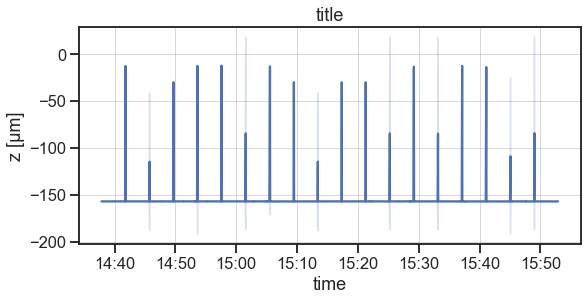

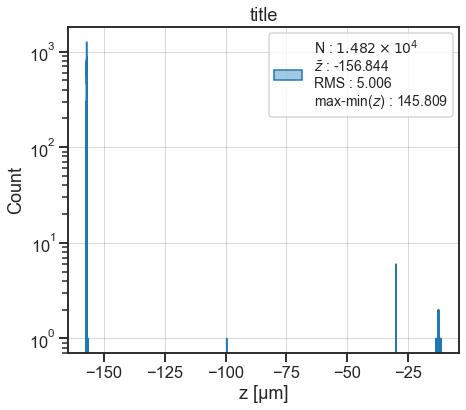

In [ ]:
tdp.control_plots(steel_hand_test)

In [ ]:
steel_hand_filter = filter_data(steel_hand_test,
                                point_cut=True,
                                mm_cut=True,
                                median_hex_cut=True)

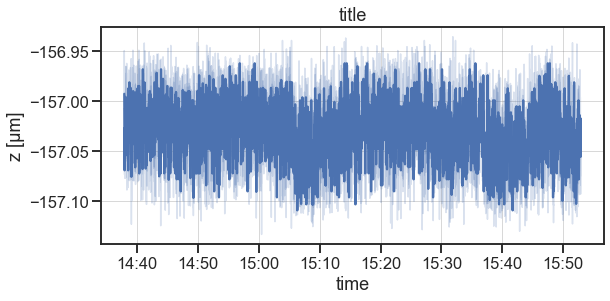

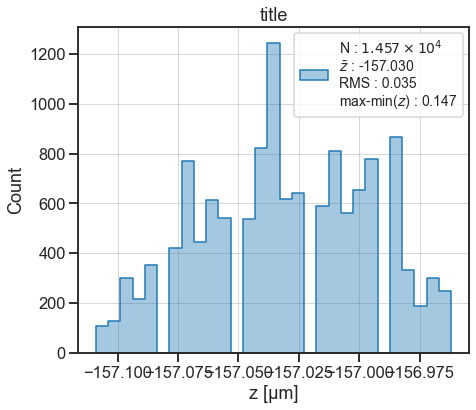

In [ ]:
control_plots(steel_hand_filter, z_col='z', hist_log=False)

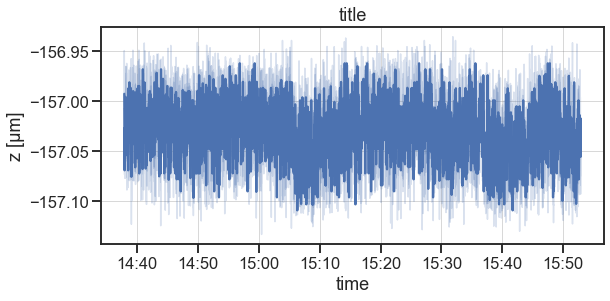

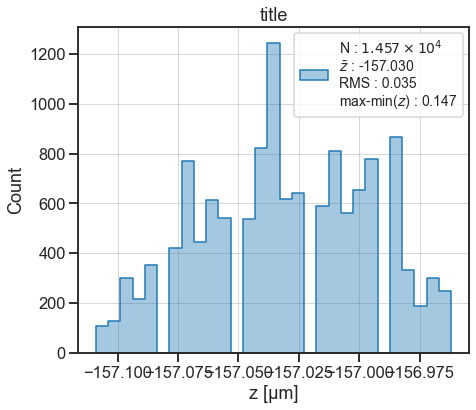

In [ ]:
control_plots(steel_hand_filter, z_col='z', hist_log=False)

# test full analysis

example test triplets v7

In [79]:
exp_db = tdu.query_exp_db()
exp_db.iloc[24]

exp_id                                                                  25
exp_description          triplets v7: blue: v=3.8mm/s; brown:v=4mm/s; v...
exp_description_short                      triplets v7,v=[3-4.2], blue tip
Name: 24, dtype: object

In [80]:
meta_data = tdu.fetch_meas_metadata(exp_id=25)

In [81]:
meta_data

,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,127,25,14.04.2022,20220414_trip_v7_bfg.txt,steel,before_glue,"[1,1000]",coordinate-blue-brown-yellow.txt,1,before gluing; no vacuum -> measurement looks ...
1,128,25,14.04.2022,20220414_trip_v7_curing.txt,steel,curing,"[n,1000]",coordinate-blue-brown-yellow.txt,1,curing v7 reps 24


In [82]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / 'triplets'

In [83]:
bfg_filename = meta_data.loc[meta_data.process_step=='before_glue'].file_name[0]
bfg_df = tdu.read_single_measurement(measurement_folder, bfg_filename)

Reading data...
Reading done


In [84]:
meta_data

,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,127,25,14.04.2022,20220414_trip_v7_bfg.txt,steel,before_glue,"[1,1000]",coordinate-blue-brown-yellow.txt,1,before gluing; no vacuum -> measurement looks ...
1,128,25,14.04.2022,20220414_trip_v7_curing.txt,steel,curing,"[n,1000]",coordinate-blue-brown-yellow.txt,1,curing v7 reps 24


In [85]:
curing_filename = meta_data.loc[meta_data.process_step=='curing'].file_name[1]
curing_df = tdu.read_single_measurement(measurement_folder, curing_filename)

Reading data...
Reading done


In [86]:
curing_df = curing_df.loc[curing_df.run_nr==1,:]

In [87]:
bfg_df['measurement_id'] = 127

In [88]:
bfg_df

,run_nr,hex_nr,point,x,y,z,unix_time,datetime,measurement_id
0,1,19,1,-93.20,61.00,-156.858,1649927228,2022-04-14 11:07:08+02:00,127
1,1,19,1,-93.39,61.19,-156.944,1649927228,2022-04-14 11:07:08+02:00,127
2,1,19,1,-93.64,61.25,-156.919,1649927228,2022-04-14 11:07:08+02:00,127
3,1,19,1,-93.89,61.19,-156.944,1649927229,2022-04-14 11:07:09+02:00,127
4,1,19,1,-94.07,61.00,-156.913,1649927229,2022-04-14 11:07:09+02:00,127
...,...,...,...,...,...,...,...,...,...
7013,1,11,60,25.65,-120.26,-156.913,1649929369,2022-04-14 11:42:49+02:00,127
7014,1,11,60,25.83,-120.44,-156.919,1649929369,2022-04-14 11:42:49+02:00,127
7015,1,11,60,26.08,-120.51,-156.938,1649929369,2022-04-14 11:42:49+02:00,127
7016,1,11,60,26.33,-120.44,-156.901,1649929369,2022-04-14 11:42:49+02:00,127


In [89]:
def preprocess_data(data_raw, precut_check=True, log_precut=True, postcut_check=True, log_postcut=False,
                    point_cut=True, mm_cut=True, median_hex_cut=True, title='title' ):

        
        if precut_check: 
                print('control plots precut')
                tdp.control_plots(data_raw, z_col='z', hist_log=log_precut,title=title, unit='mm')
                
    #* apply cuts background (=filter bg data)
        filter_df = tdu.filter_data(data_raw,
                    point_cut=point_cut,
                    mm_cut=mm_cut, 
                    median_hex_cut=median_hex_cut,)
        
        if postcut_check: 
                print('control plots post')
                tdp.control_plots(filter_df, z_col='z', hist_log=log_postcut,title=title, unit='mm')
        removed_points = data_raw.z.count() - filter_df.z.count()
        print(f'Total points removed: {removed_points}')
        print(f'Total points removed: {removed_points/ data_raw.z.count():.2f}%')
        
        filter_pt = tdu.point_table(filter_df)
        filter_pt.z_mean = tdu.subtract_mean(filter_pt.z_mean)
        filter_pt.z_mean = tdu.convert_mm_to_microns(filter_pt.z_mean)
        filter_pt = tdu.df_convert_unix_to_datetime(filter_pt)
        return filter_pt, filter_df

control plots precut
control plots post
Total points removed: 812
Total points removed: 0.12%


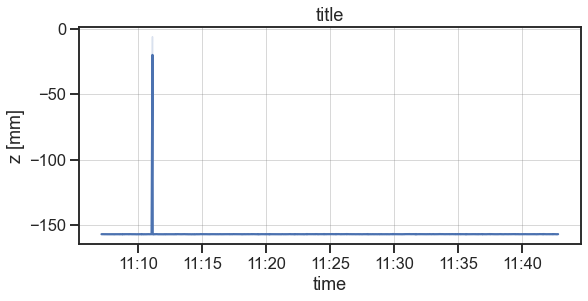

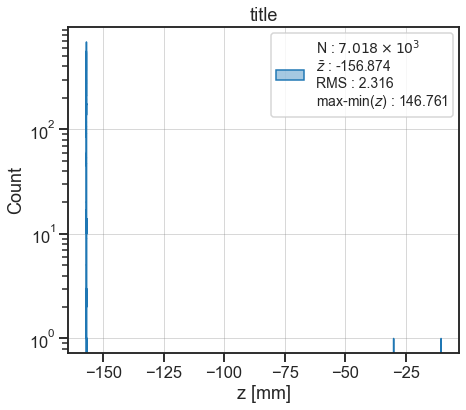

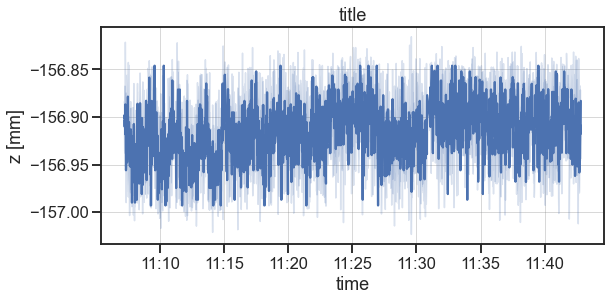

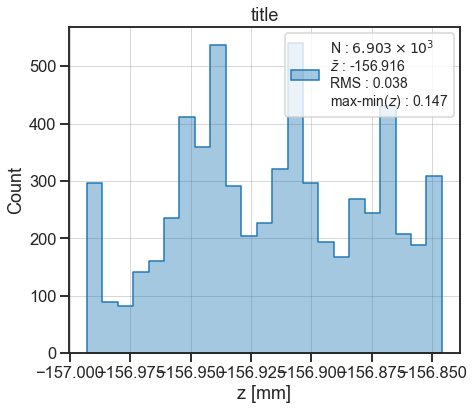

In [90]:
filter_test, _=  preprocess_data(bfg_df, median_hex_cut=True)

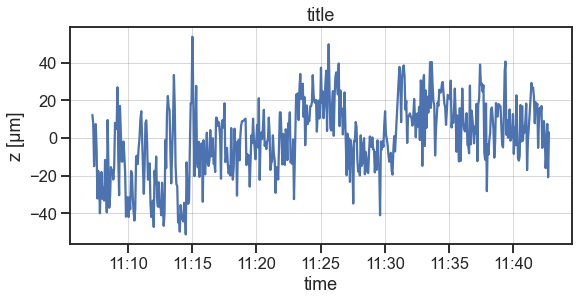

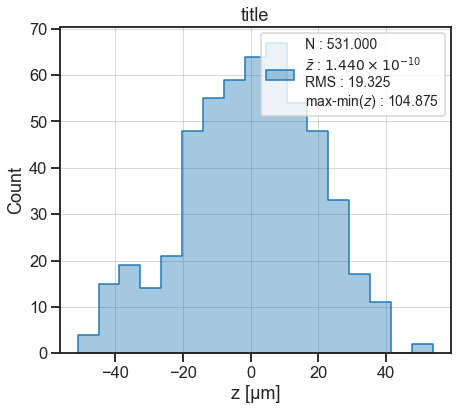

In [91]:
tdp.control_plots(filter_test, z_col='z_mean', hist_log=False)

In [92]:

def data_process_pipeline(signal_raw_df, background_raw_df,
                            point_cut_sig=True,
                            mm_cut_sig=True,
                            median_hex_cut_sig=True,
                            point_cut_bg=True,
                            mm_cut_bg=True,
                            median_hex_cut_bg=True,
                            ): 
    print('Background Data:')
    background_pt,_ = preprocess_data(background_raw_df,
                    precut_check=False,
                    postcut_check=False,
                    point_cut=point_cut_sig,
                    mm_cut=mm_cut_sig,
                    median_hex_cut=median_hex_cut_sig,)
    print('Signal Data:')
    singal_pt,_ = preprocess_data(signal_raw_df,
                precut_check=False,
                postcut_check=False,
                point_cut=point_cut_bg, mm_cut=mm_cut_bg, median_hex_cut=median_hex_cut_bg,)
    diff_pt = tdu.subtract_mean_measurements(singal_pt, background_pt)
    diff_pt.z_err = tdu.convert_mm_to_microns(diff_pt.z_err)
    diff_pt = tdu.add_triplet_color_label(diff_pt)
    diff_pt = tdu.add_ring_nr_label(diff_pt)
    return diff_pt

In [93]:
diff_pt = data_process_pipeline(curing_df, bfg_df)

Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 627
Total points removed: 0.09%


In [94]:
diff_pt = tdu.add_triplet_color_label(diff_pt)

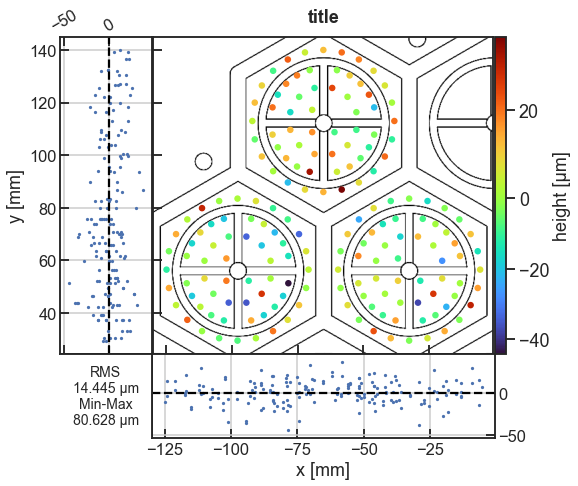

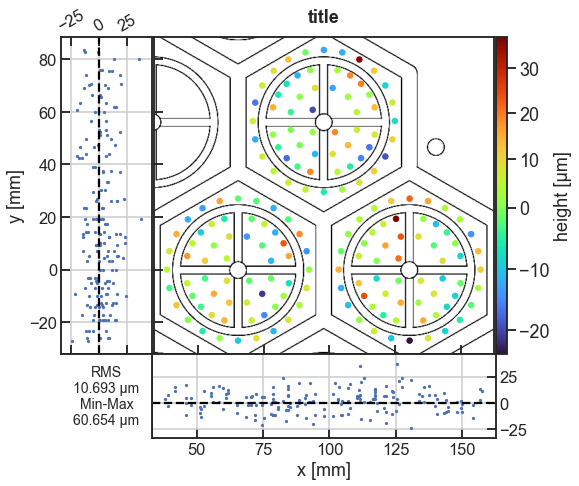

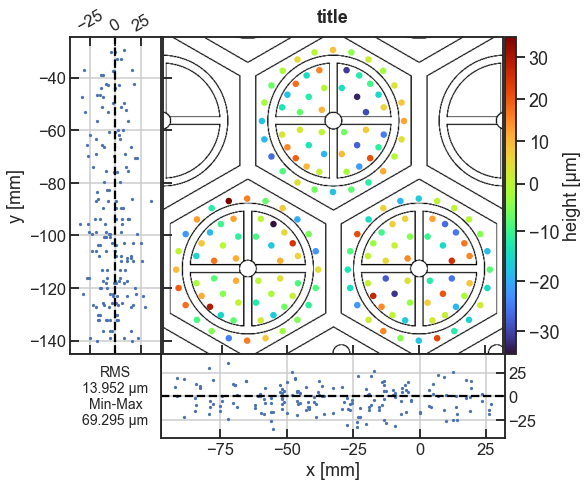

In [95]:
for col in ['blue', 'brown', 'yellow']:

    plot_df = diff_pt[diff_pt.trip_color==col]
    min_, mean_, max_ = tdu.calc_min_mean_max(plot_df, mode='z_mean')
    tdp.plot_table_hexagon_flatness(plot_df, mode='z_mean', cbar_norm = (min_,mean_,max_), triplet=True, figsize=(8,8))

In [96]:
def process_curing_data(full_signal_raw_df, background_raw_df, 
                        point_cut_sig=True,
                        mm_cut_sig=True,
                        median_hex_cut_sig=True,
                        point_cut_bg=True,
                        mm_cut_bg=True,
                        median_hex_cut_bg=True,):
    measurements_dict_pt = {}
    for run in full_signal_raw_df.run_nr.unique(): 
        data_single_run = full_signal_raw_df.loc[full_signal_raw_df.run_nr == run, :]
        data_single_run_pt = data_process_pipeline(data_single_run, background_raw_df,
                                                    point_cut=point_cut_sig,
                                                    mm_cut=mm_cut_sig,
                                                    median_hex_cut=median_hex_cut_sig,
                             point_cut=point_cut_bg, mm_cut=mm_cut_bg, median_hex_cut=median_hex_cut_bg,,)
        data_single_run_pt['run_nr'] = run
        measurements_dict_pt[f'run_nr_{run}'] = data_single_run_pt
    return measurements_dict_pt

In [97]:
curing_filename = meta_data.loc[meta_data.process_step=='curing'].file_name[1]
curing_df = tdu.read_single_measurement(measurement_folder, curing_filename)

Reading data...
Reading done


In [98]:
dict_test = process_curing_data(curing_df, bfg_df)

Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 627
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 645
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 624
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 636
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 640
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 693
Total points removed: 0.10%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 682
Total points removed: 0.10%
Background Data:
Total points remo

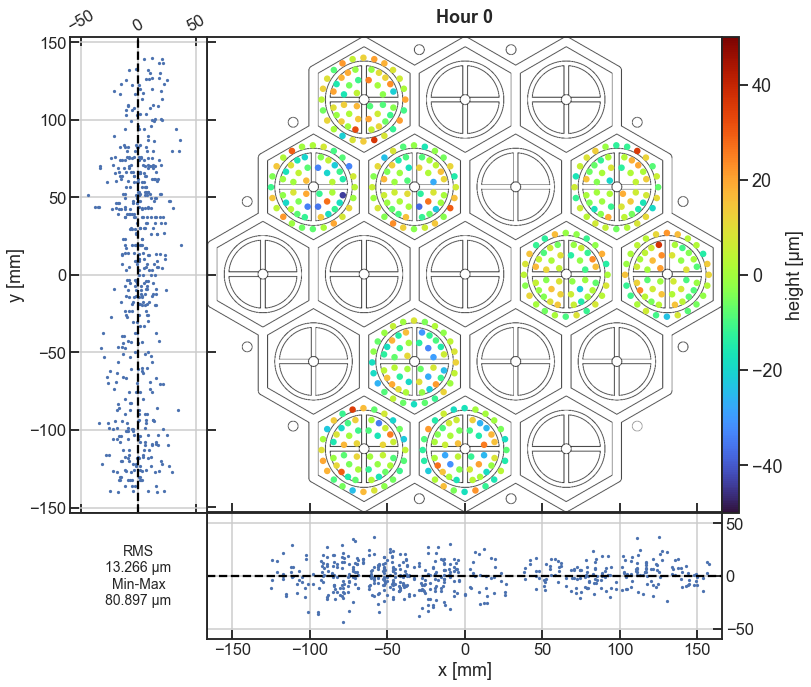

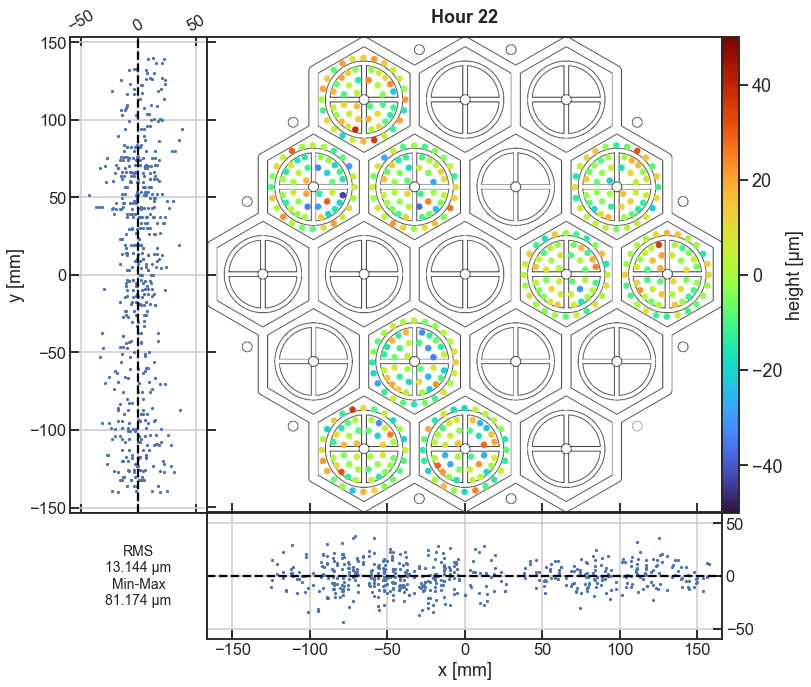

In [99]:
for key, data in dict_test.items(): 
    run_nr = int(key.split('_')[2])
    if run_nr in [1, 23]:
        fig, ax = tdp.plot_table_hexagon_flatness(data,
                                                  mode=('z_mean'),
                                                  size=5**2,
                                                  cbar_norm=(-50, 0, 50),
                                                  title=f'Hour {run_nr -1}')


In [100]:
dict_test['run_nr_1']

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,datetime,z_mean_bg,z_err_bg,z_mean,z_err,trip_color,ring_nr,run_nr
0,3,2,1.649939e+09,-29.27,-43.95,0.007566,16.666211,2022-04-14 14:21:21.846153728+02:00,30.226841,0.007079,-13.560630,10.361700,yellow,2,1
1,3,3,1.649939e+09,-23.44,-47.32,0.007414,4.948263,2022-04-14 14:21:26.076923136+02:00,37.772295,0.007920,-32.824033,10.848411,yellow,2,1
2,3,4,1.649939e+09,-20.07,-53.15,0.008854,1.332878,2022-04-14 14:21:30.230769152+02:00,30.994518,0.007646,-29.661640,11.698263,yellow,2,1
3,3,5,1.649939e+09,-13.31,-51.33,0.011784,14.409801,2022-04-14 14:21:34.230769152+02:00,8.472295,0.006630,5.937506,13.520804,yellow,3,1
4,3,6,1.649939e+09,-15.31,-46.51,0.009558,16.179032,2022-04-14 14:21:38+02:00,30.855629,0.007660,-14.676597,12.248258,yellow,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,19,56,1.649938e+09,-90.89,30.43,0.007180,-12.667122,2022-04-14 14:00:41.384615424+02:00,-13.811038,0.010626,1.143916,12.823947,blue,4,1
527,19,57,1.649938e+09,-84.38,33.13,0.004543,14.423787,2022-04-14 14:00:45.307692288+02:00,-5.311038,0.009533,19.734825,10.559990,blue,4,1
528,19,58,1.649938e+09,-78.79,37.42,0.009222,7.179032,2022-04-14 14:00:49.307692288+02:00,-0.535397,0.010702,7.714429,14.127162,blue,4,1
529,19,59,1.649938e+09,-74.50,43.01,0.007198,20.794416,2022-04-14 14:00:53.384615424+02:00,9.572295,0.009612,11.222121,12.008949,blue,4,1


In [101]:
result_df = tdu.calc_flats_statistic_df(dict_test)

In [102]:
result_df

,R,deltaR,RMS,unix_time,run_nr,datetime,time_h,odd_runs
0,80.897436,3.932301,13.265709,1649938509,1,2022-04-14 14:15:09.833551360+02:00,0.000000,1
1,80.012821,4.329082,13.213007,1649940698,2,2022-04-14 14:51:38.851371264+02:00,0.608056,0
2,83.628205,4.323476,13.143913,1649942891,3,2022-04-14 15:28:11.052442624+02:00,1.217222,1
3,82.474359,4.322963,13.129290,1649945081,4,2022-04-14 16:04:41.758220800+02:00,1.825556,0
4,81.266667,4.346225,13.226741,1649947278,5,2022-04-14 16:41:18.631176192+02:00,2.435833,1
5,78.243590,4.357393,13.037057,1649949480,6,2022-04-14 17:18:00.510792704+02:00,3.047500,0
6,81.435897,3.882625,13.189830,1649951681,7,2022-04-14 17:54:41.886136064+02:00,3.658889,1
7,82.105128,4.335683,13.201574,1649953882,8,2022-04-14 18:31:22.784443136+02:00,4.270278,0
8,79.897436,3.891128,13.059026,1649956081,9,2022-04-14 19:08:01.593075200+02:00,4.881111,1
9,82.358974,3.883674,13.152875,1649958270,10,2022-04-14 19:44:30.003477504+02:00,5.489167,0


In [103]:
def plot_R_RMS_vs_time(meas_dict_pt, timeaxis='time_h', R_range=70, RMS_range=10,): 
    '''takes flatness result DataFrame from calc_flats_statistic_df function
       to display flatness statistics vs time'''
       
    result_df = tdu.calc_flats_statistic_df(meas_dict_pt)
    import matplotlib.dates as dates
    import pytz
    local_tz = pytz.timezone('Europe/Berlin')
    fig, axes = plt.subplots(2,1, figsize=(7,7))
    #* Plot min-max (R) vs time
    ax_R = axes[0]
    ax_R.errorbar(x=result_df[timeaxis], y=result_df.R, yerr=result_df.deltaR,
                fmt='.', capsize=5,)
    if timeaxis=='datetime':
      formatter = dates.DateFormatter('%H:%M', tz=local_tz)
      ax_R.xaxis.set_major_formatter(formatter)
    else: ax_R.set_xlabel('time [hours passed]')
    ax_R.set_ylabel('Min-Max [µm]')
    ax_R.grid(True)
    R_mean = result_df.R.mean()
    R_ylim_lower = R_mean - np.floor(R_range/2)
    R_ylim_upper = R_mean + np.floor(R_range/2)
    ax_R.set_ylim(R_ylim_lower,R_ylim_upper)
   #  print(R_mean)
   #  print(R_ylim_lower)
   #  print(R_ylim_upper)
    ax_R.fill_between(result_df[timeaxis], R_mean - 12, R_mean + 12, alpha=0.2, color='tab:orange')
    ax_R.set_title('Min-Max vs time')
  
    #* Plot RMS (std(z_mean)) vs time
    ax_RMS = axes[1]
    ax_RMS.scatter(x=result_df[timeaxis], y=result_df.RMS, marker='x')
    if timeaxis=='datetime':
      ax_RMS.xaxis.set_major_formatter(formatter)
      ax_RMS.set_xlabel('datetime')
    else: ax_RMS.set_xlabel('time [hours passed]')
    
    ax_RMS.set_title('RMS vs time')
    ax_RMS.set_ylabel('RMS [µm]')
    ax_RMS.grid(True)
    RMS_mean = result_df.RMS.mean()
    RMS_ylim_lower = RMS_mean - np.floor(RMS_range/2)
    RMS_ylim_upper = RMS_mean + np.floor(RMS_range/2)
   #  print(f'RMS_lower = {RMS_ylim_lower}')
   #  print(f'RMS_ylim_upper = {RMS_ylim_upper}')
    if RMS_ylim_lower < 0: RMS_ylim_lower = 0
    ax_RMS.set_ylim(RMS_ylim_lower, RMS_ylim_upper)
    ax_RMS.axhline(RMS_mean, ls='--', c='black')
    
    plt.tight_layout()    
    return fig, axes

In [104]:
result_df

,R,deltaR,RMS,unix_time,run_nr,datetime,time_h,odd_runs
0,80.897436,3.932301,13.265709,1649938509,1,2022-04-14 14:15:09.833551360+02:00,0.000000,1
1,80.012821,4.329082,13.213007,1649940698,2,2022-04-14 14:51:38.851371264+02:00,0.608056,0
2,83.628205,4.323476,13.143913,1649942891,3,2022-04-14 15:28:11.052442624+02:00,1.217222,1
3,82.474359,4.322963,13.129290,1649945081,4,2022-04-14 16:04:41.758220800+02:00,1.825556,0
4,81.266667,4.346225,13.226741,1649947278,5,2022-04-14 16:41:18.631176192+02:00,2.435833,1
5,78.243590,4.357393,13.037057,1649949480,6,2022-04-14 17:18:00.510792704+02:00,3.047500,0
6,81.435897,3.882625,13.189830,1649951681,7,2022-04-14 17:54:41.886136064+02:00,3.658889,1
7,82.105128,4.335683,13.201574,1649953882,8,2022-04-14 18:31:22.784443136+02:00,4.270278,0
8,79.897436,3.891128,13.059026,1649956081,9,2022-04-14 19:08:01.593075200+02:00,4.881111,1
9,82.358974,3.883674,13.152875,1649958270,10,2022-04-14 19:44:30.003477504+02:00,5.489167,0


In [107]:
plot_runs = result_df.loc[result_df.odd_runs==1]

In [108]:
for row in plot_runs.itertuples():
    print(row.time_h)

0.0
1.2172222222222222
2.4358333333333335
3.658888888888889
4.881111111111111
6.097222222222222
7.309444444444445
8.526111111111112
9.743333333333334
10.95888888888889
12.176111111111112
13.395277777777778


In [80]:
def plot_dist_joyplot(all_triplet_data_dict,
                              triplet_color = 'all',
                              mode='z_mean',
                              title = "z-Distribution over time",
                              timeaxis='time_h',
                              summary_statistics=False,
                              binwidth=6, 
                              figsize=(6,12),
                              time_format = '%H:%M - %d.%m.%Y',
                              ):

    from matplotlib import cm
    stat_result_df = tdu.calc_flats_statistic_df(all_triplet_data_dict)
    plot_runs = stat_result_df.loc[stat_result_df.odd_runs==1]
    n_hours = stat_result_df.odd_runs.value_counts()[1]
    colors = cm.viridis_r(np.linspace(0, 1, n_hours))
    fig, axes = plt.subplots(n_hours ,1, figsize=figsize)
    i = 0
    z_global_max = 0 
    z_global_min = 0
    for key, data in all_triplet_data_dict.items(): 
        z_min = data[mode].min()
        z_max = data[mode].max()
        if z_max > z_global_max: z_global_max = np.rint(z_max)
        if z_min < z_global_min: z_global_min = np.rint(z_min)
        
    df_size = all_triplet_data_dict[f'run_nr_1'].size
    for row, ax, color in zip(plot_runs.itertuples(), axes, colors): 
        run_nr = row.run_nr
        if triplet_color=='all':
            data = all_triplet_data_dict[f'run_nr_{run_nr}']
        else:
            data = all_triplet_data_dict[f'run_nr_{run_nr}']
            data = data.loc[data.trip_color==triplet_color,:]
        z_min = data[mode].min()
        z_max = data[mode].max()
        R = z_max - z_min
        R = np.round(R,2) 
        sig = np.round(data[mode].std(),2)
        
        nbins = np.arange(z_global_min, z_global_max ,binwidth)
        sns.histplot(data[mode], kde=False, ax=ax, element='step', color=color,
                    stat='probability', label=f'Hour {run_nr-1}', fill=True, alpha=0.4, 
                    bins=nbins,)
        ax.spines.top.set_color('none')
        ax.spines.right.set_color('none')
        ax.axvline(0,0,1, ls='--', color='black')
        # ax.grid(True)
        plt.subplots_adjust(hspace=-0.3)
        # make background transparent
        rect = ax.patch
        rect.set_alpha(0)
        # remove borders, axis ticks, and labels
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_ylabel('')
        if i == n_hours - 1:
            ax.set_xlabel('z [µm]')
        else:
            ax.set_xticklabels([])
            ax.set_xticks([])
            ax.set_xlabel('')
        i+=1

        spines = ["top","right","left","bottom"]
        for s in spines:
            ax.spines[s].set_visible(False)
        if timeaxis == 'datetime':
            time_str = tdu.calc_measurement_date_and_time(data, time_format=time_format)
            fig.text(0.06,0.867,f"Time",fontsize=14, fontweight="bold",)
        else:
            time_str = row.time_h
            fig.text(0.06,0.867,f"Time passed [h]",fontsize=14)
        ax.text(z_global_min - 2 ,
                0.02,
                f'{time_str:.2f}',
                fontweight="bold",
                fontsize=14,
                ha="right",
                va='center')
        if summary_statistics: 
            ax.text(z_global_max+2 ,
                    0.02,
                    f'$\sigma$:{sig} µm\nmin-max:{R} µm',
                    # fontweight="bold",
                    fontsize=14,
                    ha="left",
                    va='center')
    fig.text(0.06,0.89, title ,fontsize=18, fontweight="bold",)
    return fig, axes


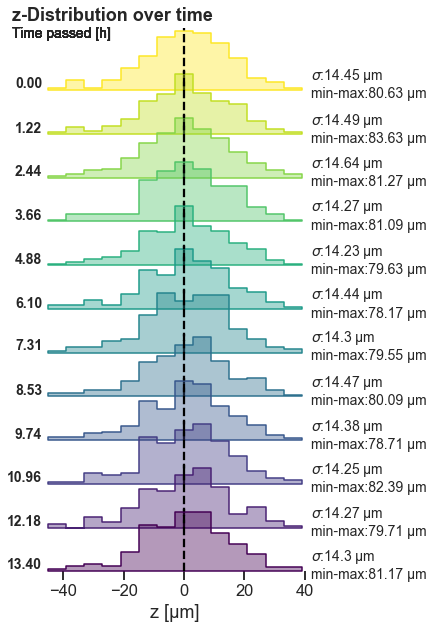

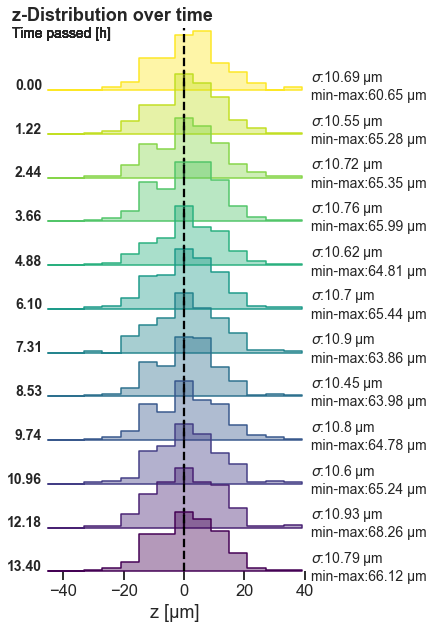

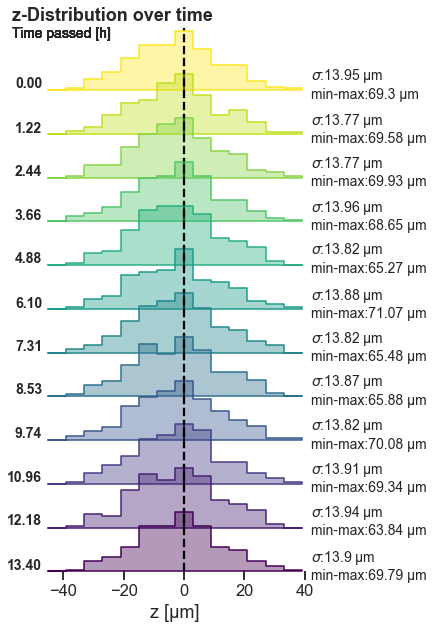

In [110]:
for col in ['blue', 'brown', 'yellow']:
    plot_dist_joyplot(dict_test, triplet_color=col, time_format='%H:%M', figsize=(5,10), summary_statistics=True)

# run 3 something went wrong in joyplot -> fixing it

In [2]:
exp_db = tdu.query_exp_db()
exp_id = 19
print(exp_db.loc[exp_db.exp_id == exp_id].exp_description.values[0])
meta_data = tdu.fetch_meas_metadata(exp_id=exp_id)
meta_data
meas_id_bg = 94
meas_id_sig = 95

triplets v3: blue: v=10mm/s; brown: v=12.5mm/s; yellow: v=15mm/s; pink tip


,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,92,19,07.02.2022,20220207_trip_vels_bfg_novac.txt,steel,before_glue,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,"1 rep before glueing with different vels= [10,..."
1,94,19,09.02.2022,20220209_trip_vels_bfg_novac.txt,steel,before_glue,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,None
2,95,19,09.02.2022,20220209_trip_v3_curing.txt,steel,curing,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,29 reps; curing data for trip v3; addendum: 15...


In [10]:
v1_data_pt = tdu.laser_data_analysis(meas_id_sig, #* meas signal
                                           meas_id_bg, #* meas bg
                                           meta_data, 
                                           folder='triplets',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            print_removed_points=True,
                                            )

20220209_trip_vels_bfg_novac.txt
Reading data...
Reading done
20220209_trip_v3_curing.txt
Reading data...
Reading done
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 1224
Total points removed: 0.17%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 868
Total points removed: 0.12%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 804
Total points removed: 0.11%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 859
Total points removed: 0.12%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 806
Total points removed: 0.11%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 798
Total points removed: 0.11%
Background Data:
Total points removed: 864
Total poi

In [ ]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / folder
#* read bg data
bfg_filename = meta_data.loc[meta_data.measurement_id==meas_id_bg].file_name.values[0]
print(bfg_filename)
bfg_df = read_single_measurement(measurement_folder, bfg_filename)
if bg_data_check:
    _,_= preprocess_data(bfg_df,
                precut_check=True,
                postcut_check=True,
                point_cut=True, mm_cut=True, median_hex_cut=True, title=bfg_filename)

In [ ]:
exp_db = tdu.query_exp_db()
exp_id = 19
print(exp_db.loc[exp_db.exp_id == exp_id].exp_description.values[0])
meta_data = tdu.fetch_meas_metadata(exp_id=exp_id)
meta_data
meas_id_bg = 94
meas_id_sig = 95

20220209_trip_vels_bfg_novac.txt
Reading data...
Reading done
control plots precut
control plots post


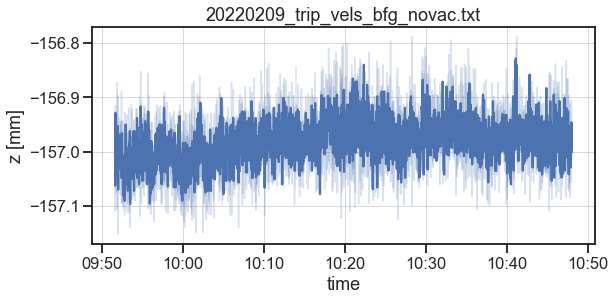

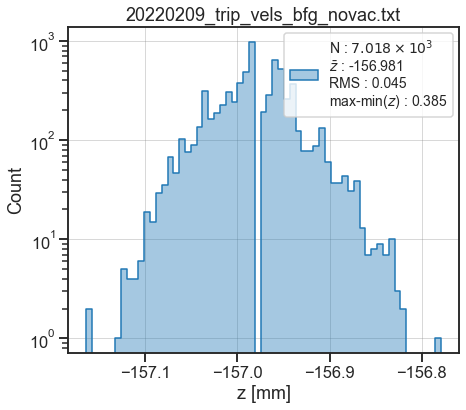

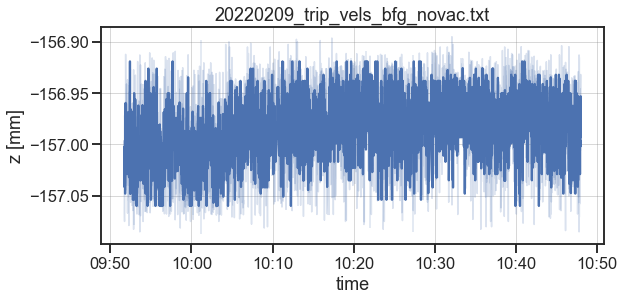

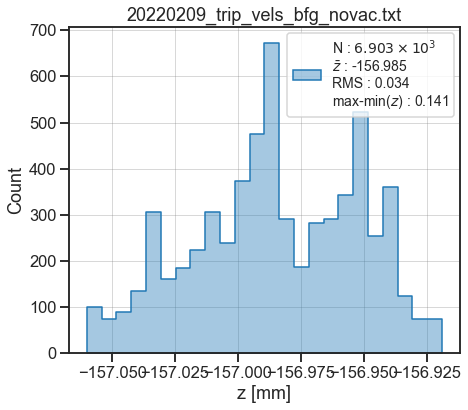

In [101]:
test_v3_df = read_data_from_meas_id('triplets', meas_id_bg, meta_data)

In [83]:
def size_check_meas_dict_pt(meas_dict_pt): 
    """checks if runs are complete, removes run if points are missing"""
    return_meas_dict = {}
    run_size = meas_dict_pt['run_nr_1'].size
    for key in meas_dict_pt.keys():
        if meas_dict_pt[key].size == run_size:
            return_meas_dict[key] = meas_dict_pt[key]
    del meas_dict_pt
    return return_meas_dict

In [84]:
r_df = size_check_meas_dict_pt(v1_data_pt)

In [85]:
r_df.keys()

dict_keys(['run_nr_1', 'run_nr_2', 'run_nr_3', 'run_nr_4', 'run_nr_5', 'run_nr_6', 'run_nr_7', 'run_nr_8', 'run_nr_9', 'run_nr_10', 'run_nr_11', 'run_nr_12', 'run_nr_13', 'run_nr_14', 'run_nr_15', 'run_nr_16', 'run_nr_17', 'run_nr_18', 'run_nr_19', 'run_nr_20', 'run_nr_21', 'run_nr_22', 'run_nr_23', 'run_nr_24', 'run_nr_25', 'run_nr_26', 'run_nr_27', 'run_nr_28'])

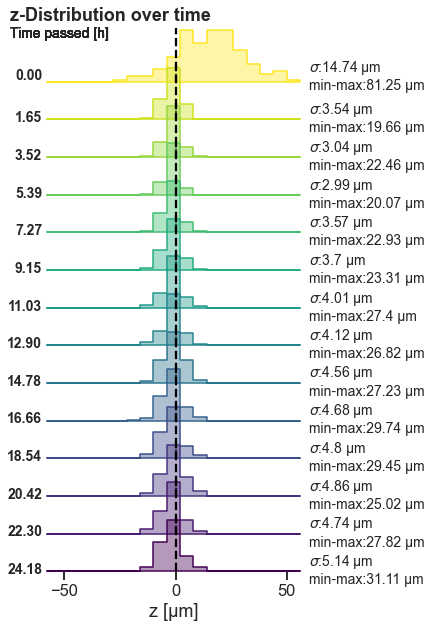

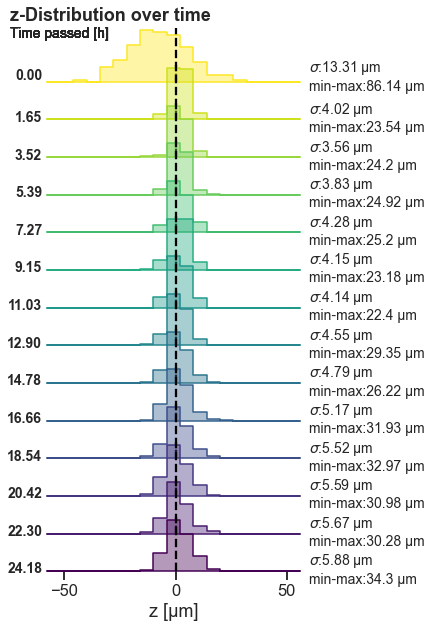

In [82]:
for col in ['blue', 'yellow']:
    tdp.plot_dist_joyplot(r_df, triplet_color=col, time_format='%H:%M', figsize=(5,10), summary_statistics=True)

In [111]:
def title_str_from_metadata(meta_data,meas_id_sig,meas_id_bg,):
    def one_data_title_str_helper(meta_data,meas_id):
        meas_id_info = meta_data.loc[meta_data.measurement_id==meas_id]
        if meas_id_info.material.values[0] == 'table':
            return 'table'
        process_step = meas_id_info.process_step.values[0]
        vac =  meas_id_info.vac_mapping.values[0]
        vac = vac_mapping_helper(vac)
        return f'({process_step}, {vac})'
    sig_string = one_data_title_str_helper(meta_data,meas_id_sig)
    bg_string = one_data_title_str_helper(meta_data,meas_id_bg)
    print(sig_string)
    title_string = '$z_{signal}$ - $z_{ref}$\n'+f'{sig_string} - {bg_string}'
    return title_string

In [125]:
def vac_mapping_helper(vac_str):
    import re
    pattern = re.compile(r'\w*[0-9]+')
    matches = pattern.findall(vac_str)
    for match in matches:
        print(match)
    if matches[-1] == '1000':
        return 'vac off'
    if matches[-1] == '60':
        return 'vac on'
    else: return 'vac {matches[1]} mbar'

In [126]:
test_str = '[blue:1000;brown:1000;yellow:60]'

In [128]:
res = vac_mapping_helper(test_str)

1000
1000
60


# now create full analysis from measurement_id's & rework laser_analysis by catching a few kwargs

In [129]:
exp_db = tdu.query_exp_db()

In [130]:
exp_db.iloc[24].exp_description

'triplets v7: blue: v=3.8mm/s; brown:v=4mm/s; v=4.2mm/s; blue tip'

In [131]:
exp_id=25

In [132]:
meta_data = tdu.fetch_meas_metadata(exp_id=25)

In [133]:
meta_data

,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,127,25,14.04.2022,20220414_trip_v7_bfg.txt,steel,before_glue,"[1,1000]",coordinate-blue-brown-yellow.txt,1,before gluing; no vacuum -> measurement looks ...
1,128,25,14.04.2022,20220414_trip_v7_curing.txt,steel,curing,"[n,1000]",coordinate-blue-brown-yellow.txt,1,curing v7 reps 24


In [134]:
def test_func(**kwargs): 
    if 'test' not in kwargs.keys(): test=True
    else: test = kwargs['test']
    for key, val in kwargs.items():
        print(f'{key}: {val}')
    print(test)

In [135]:
test_func(test={'a':1})

test: {'a': 1}
{'a': 1}


In [171]:
def data_process_pipeline(signal_raw_df, background_raw_df, print_removed_points=False ,**kwargs):
    """ function to preprocess raw signal & raw background data and to subtract them from one another
    returns: diff_pt: total dataframe of subtracted singal - background pivot tables """
    if 'bg_filter_cuts' not in kwargs.keys():
        bg_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: bg_filter_cuts = kwargs['bg_filter_cuts']
    
    if 'sig_filter_cuts' not in kwargs.keys():
        sig_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: sig_filter_cuts = kwargs['sig_filter_cuts']
    
    if 'print_removed_points' not in kwargs.keys(): print_removed_points=True
    else: print_removed_points = kwargs['print_removed_points']

    if print_removed_points: print('Background Data:')
    background_pt,_ = tdu.preprocess_data(background_raw_df,
                    precut_check=False,
                    postcut_check=False,
                    print_removed_points=print_removed_points,
                    **bg_filter_cuts)
    if print_removed_points: print('Signal Data:')
    singal_pt,_ = tdu.preprocess_data(signal_raw_df,
                precut_check=False,
                postcut_check=False,
                print_removed_points=print_removed_points,
                **sig_filter_cuts)
    diff_pt = tdu.subtract_mean_measurements(singal_pt, background_pt)
    diff_pt = tdu.add_triplet_color_label(diff_pt)
    diff_pt = tdu.add_ring_nr_label(diff_pt)
    return diff_pt

In [172]:
def read_data_from_meas_id(folder,
                           meas_id,
                           meta_data):
    from pathlib import Path
    measurement_folder  = Path.cwd().parent / 'measurements' / folder
    #* read data
    filename = meta_data.loc[meta_data.measurement_id==meas_id].file_name.values[0]
    print(filename)
    df = tdu.read_single_measurement(measurement_folder, filename)
    return df

In [173]:
def process_curing_data(full_signal_raw_df, background_raw_df, **kwargs):
    if 'bg_filter_cuts' not in kwargs.keys():
        bg_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: bg_filter_cuts = kwargs['bg_filter_cuts']
    
    if 'sig_filter_cuts' not in kwargs.keys():
        sig_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: sig_filter_cuts = kwargs['sig_filter_cuts']
        
    measurements_dict_pt = {}
    for run in full_signal_raw_df.run_nr.unique(): 
        data_single_run = full_signal_raw_df.loc[full_signal_raw_df.run_nr == run, :]
        data_single_run_pt = data_process_pipeline(data_single_run, background_raw_df,
                                                   sig_filter_cuts=sig_filter_cuts,
                                                   bg_filter_cuts=bg_filter_cuts,)
        data_single_run_pt['run_nr'] = run
        measurements_dict_pt[f'run_nr_{run}'] = data_single_run_pt
    return measurements_dict_pt

In [174]:
def laser_data_analysis(meas_id_sig, meas_id_bg,
                        meta_data=meta_data,
                        folder='triplets',
                        **kwargs): 
    #? catch relevant keyword arguments: 
    if 'bg_data_check' not in kwargs.keys(): bg_data_check=False
    else: bg_data_check = kwargs['bg_data_check']
    
    if 'print_removed_points' not in kwargs.keys(): print_removed_points=True
    else: print_removed_points = kwargs['print_removed_points']
    
    if 'sig_data_check' not in kwargs.keys(): sig_data_check=False
    else: sig_data_check = kwargs['sig_data_check']
    
    if 'bg_filter_cuts' not in kwargs.keys():
        bg_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: bg_filter_cuts = kwargs['bg_filter_cuts']
    
    if 'sig_filter_cuts' not in kwargs.keys():
        sig_filter_cuts={'mm_cut':True, 'median_hex_cut':True, 'point_cut':True}
    else: sig_filter_cuts = kwargs['sig_filter_cuts']
 # * change this part if importing from different source (eg. all_measurements.db)
    bfg_df = read_data_from_meas_id(folder,
                           meas_id_bg,
                           meta_data)
#*--
    if bg_data_check:
        _,_= preprocess_data(bfg_df,
                    precut_check=True,
                    postcut_check=True,
                    title=bfg_filename,
                    **bg_filter_cuts)
    # * change this part if importing from different source (eg. all_measurements.db)
    signal_df = read_data_from_meas_id(folder,
                           meas_id_sig,
                           meta_data)
#*--
    if sig_data_check:
        _,_ = tdu.preprocess_data(signal_df,
                precut_check=True,
                postcut_check=True,
                **sig_filter_cuts)
        
    #* process both datasets
    # todo: in diese funktion müssen die cuts rein 

    meas_dict_pt = process_curing_data(signal_df,
                                       bfg_df,
                                       print_removed_points=print_removed_points,
                                       sig_filter_cuts=sig_filter_cuts,
                                       bg_filter_cuts=bg_filter_cuts,)
    meas_dict_pt = size_check_meas_dict_pt(meas_dict_pt)
    return meas_dict_pt

In [175]:
meas_id_before_gluing = 127
meas_id_curing = 128
v7_test_dict_pt = laser_data_analysis(meas_id_curing, meas_id_before_gluing)

20220414_trip_v7_bfg.txt
Reading data...
Reading done
20220414_trip_v7_curing.txt
Reading data...
Reading done
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 627
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 645
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 624
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 636
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 640
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 693
Total points removed: 0.10%
Background Data:
Total points removed: 812
Total points remov

In [176]:
v7_test_dict_pt.keys()

dict_keys(['run_nr_1', 'run_nr_2', 'run_nr_3', 'run_nr_4', 'run_nr_5', 'run_nr_6', 'run_nr_7', 'run_nr_8', 'run_nr_9', 'run_nr_10', 'run_nr_11', 'run_nr_12', 'run_nr_13', 'run_nr_14', 'run_nr_15', 'run_nr_16', 'run_nr_17', 'run_nr_18', 'run_nr_19', 'run_nr_20', 'run_nr_21', 'run_nr_22', 'run_nr_23', 'run_nr_24'])

In [177]:
plot_df = v7_test_dict_pt['run_nr_1']
plot_df

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,datetime,z_mean_bg,z_err_bg,z_mean,z_err,trip_color,ring_nr,run_nr
0,3,2,1.649939e+09,-29.27,-43.95,7.566232,16.666211,2022-04-14 14:21:21.846153728+02:00,30.226841,7.079334,-13.560630,10.361700,yellow,2,1
1,3,3,1.649939e+09,-23.44,-47.32,7.413835,4.948263,2022-04-14 14:21:26.076923136+02:00,37.772295,7.919790,-32.824033,10.848411,yellow,2,1
2,3,4,1.649939e+09,-20.07,-53.15,8.853904,1.332878,2022-04-14 14:21:30.230769152+02:00,30.994518,7.645766,-29.661640,11.698263,yellow,2,1
3,3,5,1.649939e+09,-13.31,-51.33,11.783783,14.409801,2022-04-14 14:21:34.230769152+02:00,8.472295,6.629828,5.937506,13.520804,yellow,3,1
4,3,6,1.649939e+09,-15.31,-46.51,9.557578,16.179032,2022-04-14 14:21:38+02:00,30.855629,7.659800,-14.676597,12.248258,yellow,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,19,56,1.649938e+09,-90.89,30.43,7.179853,-12.667122,2022-04-14 14:00:41.384615424+02:00,-13.811038,10.625597,1.143916,12.823947,blue,4,1
527,19,57,1.649938e+09,-84.38,33.13,4.542656,14.423787,2022-04-14 14:00:45.307692288+02:00,-5.311038,9.532978,19.734825,10.559990,blue,4,1
528,19,58,1.649938e+09,-78.79,37.42,9.222333,7.179032,2022-04-14 14:00:49.307692288+02:00,-0.535397,10.701648,7.714429,14.127162,blue,4,1
529,19,59,1.649938e+09,-74.50,43.01,7.198467,20.794416,2022-04-14 14:00:53.384615424+02:00,9.572295,9.612332,11.222121,12.008949,blue,4,1


In [178]:
def plot_analysis_results(exp_id:int,
                          meas_id_sig:int,
                          meas_id_bg:int,
                          meas_dict_pt:dict,
                          exp_db=exp_db,
                          meta_data=meta_data,
                          joyplot=True,
                          joyplot_summary_stats=False,
                          R_vs_t=True,
                          hexagon_flatness=True,
                          plot_runs=None, # otherwise list of runs to plot
                          triplet=True): 
    #*=============== hexagon flatness plot ===================
    if plot_runs==None:
        plot_runs=np.arange(1,len(meas_dict_pt.keys())+1,1)
    if triplet:
        example_run = meas_dict_pt['run_nr_1']
        colors = example_run.trip_color.unique()
    if hexagon_flatness:
        title_string = tdp.title_str_from_metadata(meta_data, meas_id_sig, meas_id_bg)
        stats_df = tdu.calc_flats_statistic_df(meas_dict_pt)
        for row in stats_df.itertuples(): 
            run_nr = row.run_nr
            if run_nr in plot_runs:
                if triplet:
                    for col in colors:
                        data = meas_dict_pt[f'run_nr_{run_nr}']
                        plot_df = data[data.trip_color==col]
                        fig, ax = tdp.plot_table_hexagon_flatness(plot_df,
                                                                    mode=('z_mean'),
                                                                    size=5**2,
                                                                    cbar_norm=(-50, 0, 50),
                                                                    triplet=triplet,
                                                                    title=title_string,
                                                                    figsize=(8,8),
                                                                    fontsize_ticklabels=14)
                        exp_description_str_short = exp_db.loc[exp_db.exp_id == exp_id].exp_description_short.values[0]
                        fig.text(0.05,0.901, f'{exp_description_str_short}\nhour {row.time_h:.2f}\n{col} triplet' ,fontsize=16,)
                else:
                    data = meas_dict_pt[f'run_nr_{run_nr}']
                    fig, ax = tdp.plot_table_hexagon_flatness(data,
                                                                mode=('z_mean'),
                                                                size=5**2,
                                                                cbar_norm=(-50, 0, 50),
                                                                triplet=triplet,
                                                                title=title_string)
                    exp_description_str_short = exp_db.loc[exp_db.exp_id == exp_id].exp_description_short.values[0]
                    fig.text(0.05,0.865, f'{exp_description_str_short}\nhour {row.time_h:.2f}' ,fontsize=16,)
       #*=============== R vs t plot ===================
    if R_vs_t:
        tdp.plot_R_RMS_vs_time(meas_dict_pt)
       #*=============== joyplot ===================
    if joyplot:
        if triplet:
            for col in colors:
                fig_joy, ax_joy = tdp.plot_dist_joyplot(meas_dict_pt,
                                      timeaxis='time_h,',
                                      time_format='%H:%M',
                                      figsize=(5,10),
                                      summary_statistics=joyplot_summary_stats)
                fig_joy.text(0.78,0.901, f'{col} triplet' ,fontsize=16,)
        else:
            tdp.plot_dist_joyplot(meas_dict_pt,
                                  timeaxis='time_h,',
                                  time_format='%H:%M',
                                  figsize=(5,10),
                                  summary_statistics=joyplot_summary_stats)

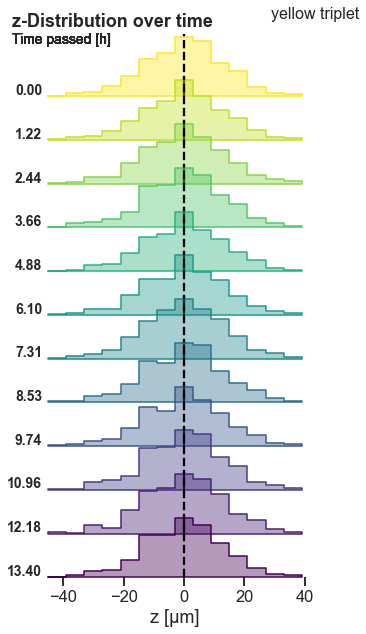

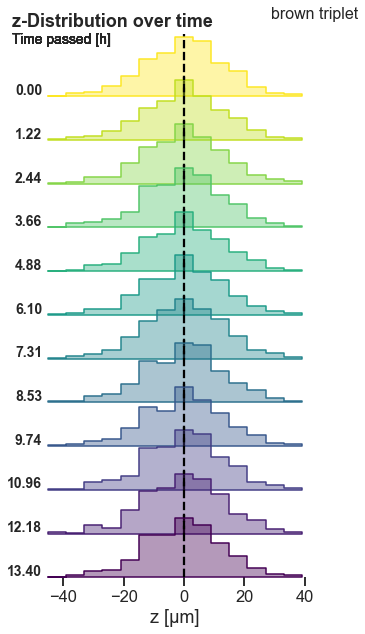

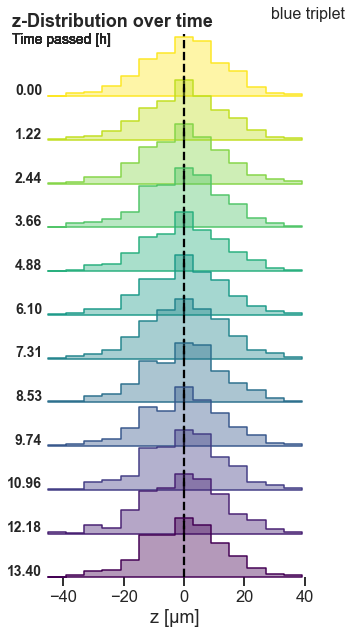

In [179]:
plot_analysis_results(exp_id, meas_id_curing, meas_id_before_gluing, v7_test_dict_pt, hexagon_flatness=False, R_vs_t=False,
                      plot_runs=[1,23], joyplot_summary_stats=False, joyplot=True)